The purpose of this project will be to analyze traffic collision data in Los Angeles and see what insights we can uncover. 

In [4]:
import pandas as pd
import numpy as np

In [285]:
df = pd.read_csv(r"C:\Users\dbmcm\OneDrive\Documents\LA Collisions Project\Traffic_Collision_Data_from_2010_to_Present.csv")
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


In [286]:
df['MO Codes'] = df['MO Codes'].convert_dtypes()

In [287]:
# These functions look for certain police codes in the "MO Codes" column and define new dummy variable columns that indicate whether a certain property was present in the accident. For example, if '3027' is one of the listed codes, it means there was a fatality, and a value of 1 will be coded in the new "Fatality" column for this particular collision.
def pedestrian(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3036' in code or '3501' in code:
            return 1
    return 0

In [288]:
def bicycle(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3008' in code or '3016' in code:
            return 1
    return 0
    
def fatal(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3027' in code: 
            return 1
    return 0
    
def severeinjury(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3024' in code:
            return 1
    return 0

def otherinjury(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3025' in code or '3026' in code:
            return 1
    return 0

def noinjury(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3028' in code:
            return 1
    return 0

def at_intersection(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3036' in code:
            return 1
    return 0
def fixedobject(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3011' in code or '3014' in code:
            return 1
    return 0

def multi_car(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3009' in code or '3013' in code or '3014' in code or '3015' in code:
            return 1
    return 0
def DUI(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3038' in code or '3039' in code:
            return 1
    return 0
def HandR(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3029' in code or '3030' in code:
            return 1
    return 0

def Movement(code):
    if code is not None and code is not pd.NA and len(code) > 0:
        if '3701' in code:
            return 1
    return 0

In [289]:
df["Pedestrian_involved"] = df['MO Codes'].apply(pedestrian)

In [290]:
df["Bicycle_involved"] = df['MO Codes'].apply(bicycle)
df["Fixed_object_involved"] = df['MO Codes'].apply(fixedobject)
df["Multiple_cars_involved"] = df['MO Codes'].apply(multi_car)
df["At_intersetion"] = df['MO Codes'].apply(at_intersection)
df["DUI"] = df['MO Codes'].apply(DUI)
df["Severe_injury"] = df['MO Codes'].apply(severeinjury)
df["Other_injury"] = df['MO Codes'].apply(otherinjury)
df["No_injury"] = df['MO Codes'].apply(noinjury)
df["Fatality"] = df['MO Codes'].apply(fatal)
df["Hit_and_run"] = df['MO Codes'].apply(HandR)
df['Movement'] = df['MO Codes'].apply(Movement)

In [291]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Fixed_object_involved,Multiple_cars_involved,At_intersetion,DUI,Severe_injury,Other_injury,No_injury,Fatality,Hit_and_run,Movement
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,...,0,0,1,0,0,1,0,0,0,0
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,...,0,0,0,1,0,0,1,0,1,0
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,...,0,0,0,0,0,0,0,0,1,1
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,...,1,0,0,0,0,0,0,0,0,1
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,...,0,0,0,0,0,1,0,0,0,0


In [292]:
df.drop(columns = ["DR Number", "Date Reported", "Crime Code", "Crime Code Description"], inplace= True)

In [293]:
df.drop(columns = ["Premise Description", "Premise Code"], inplace = True)

In [294]:
df.dtypes

Date Occurred                     object
Time Occurred                      int64
Area ID                            int64
Area Name                         object
Reporting District                 int64
MO Codes                  string[python]
Victim Age                       float64
Victim Sex                        object
Victim Descent                    object
Address                           object
Cross Street                      object
Location                          object
Pedestrian_involved                int64
Bicycle_involved                   int64
Fixed_object_involved              int64
Multiple_cars_involved             int64
At_intersetion                     int64
DUI                                int64
Severe_injury                      int64
Other_injury                       int64
No_injury                          int64
Fatality                           int64
Hit_and_run                        int64
Movement                           int64
dtype: object

In [295]:
#Next thing we need to do is format the date and time columns correctly
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'])


In [296]:
df['Time Occurred'] = df['Time Occurred'].convert_dtypes()

In [297]:
#In the original data, "Time Occurred" is oddly formatted, so this is to modify the listed times into a more useful format. 
def format_time(time_str):
    time_str = str(time_str).zfill(4)
    hours = time_str[:2] 
    minutes = time_str[2:]  
    return f"{hours}:{minutes}:00"
df['Time Occurred'] = df['Time Occurred'].apply(format_time)

df.head()

,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,MO Codes,Victim Age,Victim Sex,Victim Descent,Address,...,Fixed_object_involved,Multiple_cars_involved,At_intersetion,DUI,Severe_injury,Other_injury,No_injury,Fatality,Hit_and_run,Movement
0,2019-08-24,04:50:00,3,Southwest,356,3036 3004 3026 3101 4003,22.0,M,H,JEFFERSON BL,...,0,0,1,0,0,1,0,0,0,0
1,2019-08-30,23:20:00,3,Southwest,355,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,JEFFERSON BL,...,0,0,0,1,0,0,1,0,1,0
2,2019-08-25,05:45:00,4,Hollenbeck,422,3101 3401 3701 3006 3030,NaN,M,X,N BROADWAY,...,0,0,0,0,0,0,0,0,1,1
3,2019-11-20,03:50:00,1,Central,128,0605 3101 3401 3701 3011 3034,21.0,M,H,1ST,...,1,0,0,0,0,0,0,0,0,1
4,2019-08-30,21:00:00,3,Southwest,374,0605 4025 3037 3004 3025 3101,49.0,M,B,MARTIN LUTHER KING JR,...,0,0,0,0,0,1,0,0,0,0


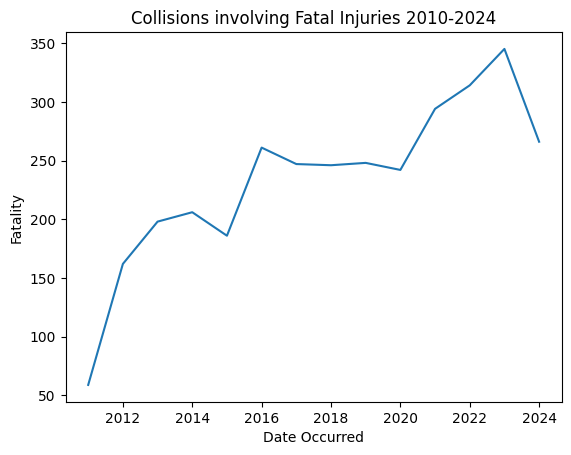

In [332]:
# Data Exploration
# Let's first look at fatal accidents as a function of year.
import seaborn as sns
import matplotlib.pyplot as plt
df_fatal = df[df['Fatality']==1]
df_fatal 

# There are 3274 fatal collisions

fatalities_by_year = df_fatal.groupby(df["Date Occurred"].dt.year)['Fatality'].sum()
sns.lineplot(data = fatalities_by_year) # Pretty clear uptrend
plt.title("Collisions involving Fatal Injuries 2010-2024")
plt.show()

In [ ]:
#To Do: Graph fatal accidents per year as a percentage of total accidents

In [299]:
df_fatal

,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,MO Codes,Victim Age,Victim Sex,Victim Descent,Address,...,Fixed_object_involved,Multiple_cars_involved,At_intersetion,DUI,Severe_injury,Other_injury,No_injury,Fatality,Hit_and_run,Movement
132,2019-08-29,05:52:00,8,West LA,858,3011 3027 3034 3037 3101 3401 3701 4027,NaN,M,W,PICO BL,...,1,0,0,0,0,0,0,1,0,1
135,2019-08-30,08:55:00,8,West LA,858,3003 3027 3035 3036 3101 3401 3701 4027,67.0,F,H,WHITWORTH DR,...,0,0,1,0,0,0,0,1,0,1
152,2019-04-11,05:40:00,10,West Valley,1043,3003 3037 3027 3101 3701 4026 3401,90.0,M,W,RESEDA BL,...,0,0,0,0,0,0,0,1,0,1
313,2019-08-31,12:15:00,16,Foothill,1656,3003 3027 3032 3037 3101 3401 3701 4026,60.0,F,H,FOOTHILL BL,...,0,0,0,0,0,0,0,1,0,1
730,2017-11-05,15:40:00,17,Devonshire,1777,3037 3103 3401 3701 4026 3012 3027,30.0,NaN,NaN,WOODLEY AV,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617140,2024-07-28,21:30:00,12,77th Street,1253,3601 3501 3027 3003 4025,70.0,M,B,FLORENCE AV,...,0,0,0,0,0,0,0,1,0,0
617145,2024-07-24,09:35:00,13,Newton,1341,0605 3004 3027 3033 3036 3038 3101 4024 3401 3701,29.0,F,H,HILL ST,...,0,0,1,1,0,0,0,1,0,1
617300,2024-07-23,01:50:00,3,Southwest,321,3003 3027 4025 3029 3036 1218 3501 3601,40.0,F,W,LA CIENEGA BL,...,0,0,1,0,0,0,0,1,1,0
617310,2024-07-27,21:45:00,11,Northeast,1145,3401 3701 3027 0605 3003 3033 3035 3037 3101 4024,34.0,M,W,RIVERSIDE DR,...,0,0,0,0,0,0,0,1,0,1


In [300]:
fatalities_by_year

Date Occurred
2011     59
2012    162
2013    198
2014    206
2015    186
2016    261
2017    247
2018    246
2019    248
2020    242
2021    294
2022    314
2023    345
2024    266
Name: Fatality, dtype: int64

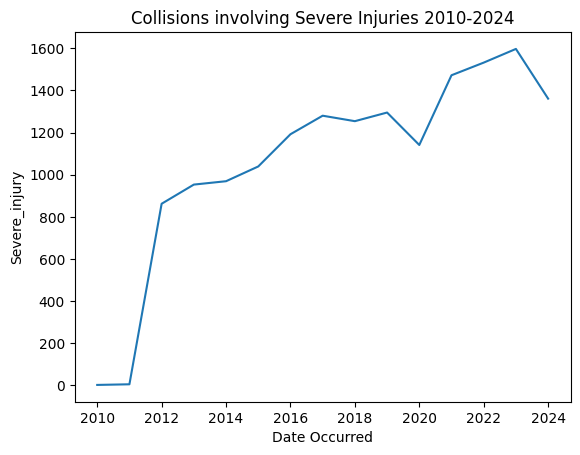

In [331]:
df_severe = df[df['Severe_injury']==1]
df_severe

severe_injury_by_year = df_severe.groupby(df["Date Occurred"].dt.year)['Severe_injury'].sum()
severe_injury_by_year
sns.lineplot(severe_injury_by_year)
plt.title("Collisions involving Severe Injuries 2010-2024")
plt.show()

In [302]:
severe_injury_by_year

Date Occurred
2010       2
2011       5
2012     862
2013     953
2014     969
2015    1039
2016    1192
2017    1280
2018    1254
2019    1295
2020    1141
2021    1472
2022    1532
2023    1597
2024    1361
Name: Severe_injury, dtype: int64

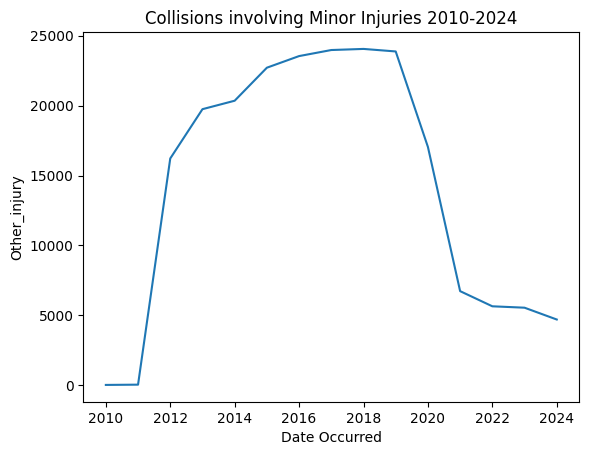

In [330]:
df_other_injuries = df[df['Other_injury']==1]
df_other_injuries = df_other_injuries.groupby(df["Date Occurred"].dt.year)['Other_injury'].sum()
df_other_injuries
sns.lineplot(df_other_injuries)
plt.title("Collisions involving Minor Injuries 2010-2024")
plt.show()

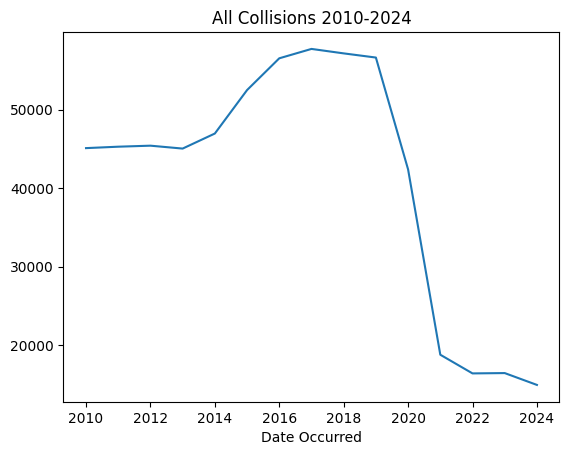

In [329]:
# Finding Total Incidents by Year
df_incidents = df.groupby(df["Date Occurred"].dt.year).size()
sns.lineplot(df_incidents)
plt.title("All Collisions 2010-2024")
plt.show()

In [305]:
df_incidents

Date Occurred
2010    45098
2011    45280
2012    45409
2013    45040
2014    46956
2015    52488
2016    56532
2017    57727
2018    57159
2019    56628
2020    42384
2021    18795
2022    16417
2023    16459
2024    14951
dtype: int64

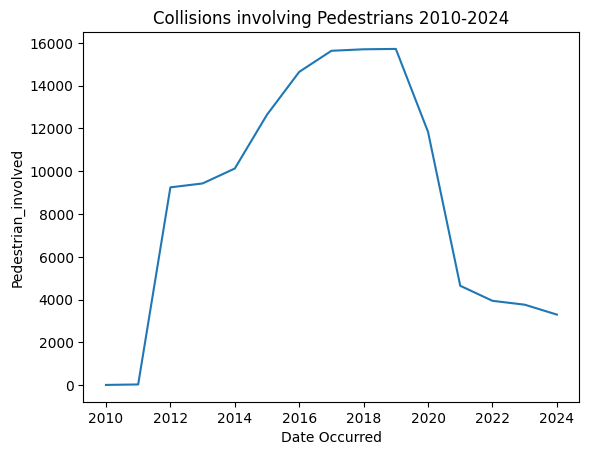

In [328]:
df_ped = df[df['Pedestrian_involved']==1]
df_ped = df_ped.groupby(df["Date Occurred"].dt.year)['Pedestrian_involved'].sum()
sns.lineplot(df_ped)
plt.title("Collisions involving Pedestrians 2010-2024")
plt.show()

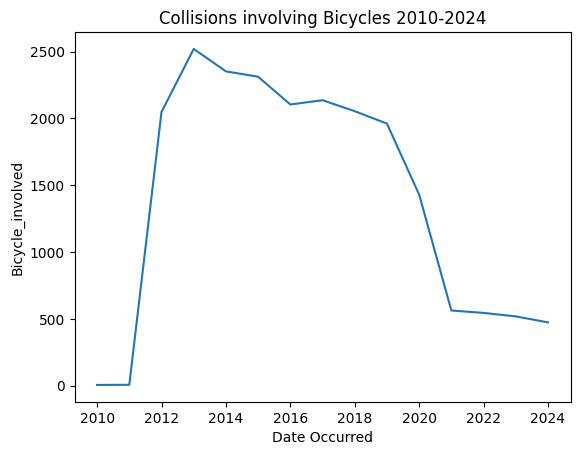

In [327]:
df_bikes = df[df['Bicycle_involved']==1]
df_bikes = df_bikes.groupby(df["Date Occurred"].dt.year)['Bicycle_involved'].sum()
sns.lineplot(df_bikes)
plt.title("Collisions involving Bicycles 2010-2024")
plt.show()

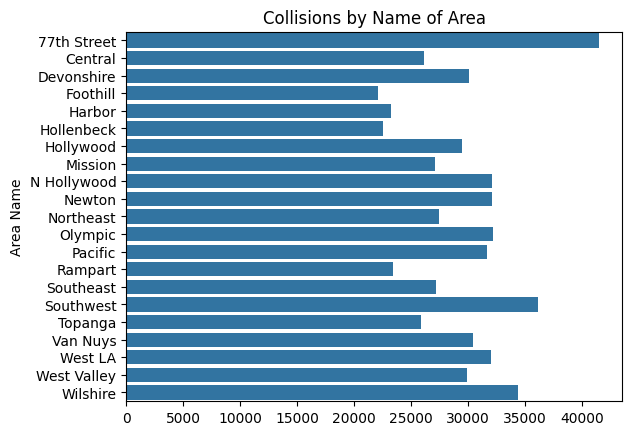

In [326]:
df_area = df.groupby(df["Area Name"]).size()
sns.barplot(data=df_area, orient = 'h')
plt.title("Collisions by Name of Area")
plt.show()

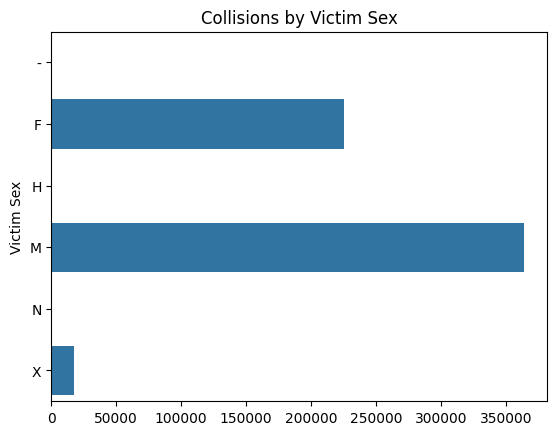

In [325]:
df_sex = df.groupby(df["Victim Sex"]).size()
sns.barplot(data=df_sex, orient = 'h')
plt.title("Collisions by Victim Sex")
plt.show()

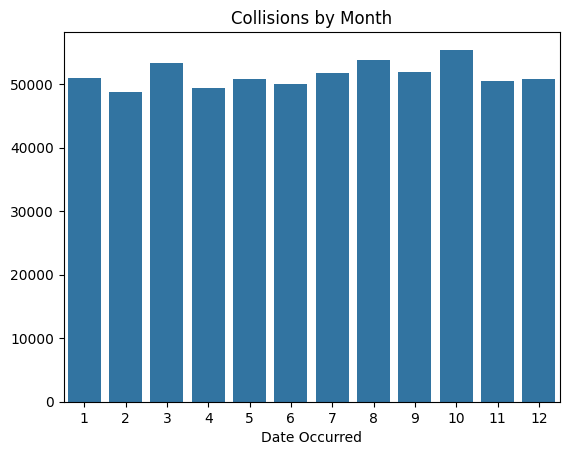

In [324]:
df_by_month = df.groupby(df["Date Occurred"].dt.month).size()
sns.barplot(df_by_month)
plt.title("Collisions by Month")
plt.show()

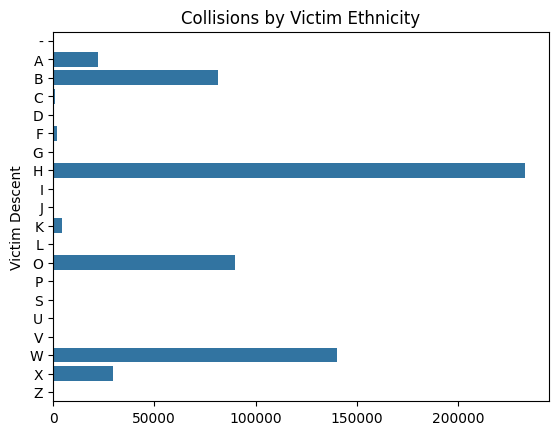

In [323]:
df_ethnic = df.groupby(df["Victim Descent"]).size()

sns.barplot(data=df_ethnic, orient = 'h')
plt.title("Collisions by Victim Ethnicity")
plt.show()

In [29]:
df['Location'][0]

'(34.0255, -118.3002)'

In [312]:
def latitude (data):
    latitude, longitude = data.split('(')[1].split(')')[0].split(',')
    return latitude
def longitude (data):
    latitude, longitude = data.split('(')[1].split(')')[0].split(',')
    return longitude
    
df['Latitude'] = df['Location'].apply(latitude)
df['Longitude'] = df['Location'].apply(longitude)


In [313]:
df.head()

,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,MO Codes,Victim Age,Victim Sex,Victim Descent,Address,...,At_intersetion,DUI,Severe_injury,Other_injury,No_injury,Fatality,Hit_and_run,Movement,Latitude,Longitude
0,2019-08-24,04:50:00,3,Southwest,356,3036 3004 3026 3101 4003,22.0,M,H,JEFFERSON BL,...,1,0,0,1,0,0,0,0,34.0255,-118.3002
1,2019-08-30,23:20:00,3,Southwest,355,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,JEFFERSON BL,...,0,1,0,0,1,0,1,0,34.0256,-118.3089
2,2019-08-25,05:45:00,4,Hollenbeck,422,3101 3401 3701 3006 3030,NaN,M,X,N BROADWAY,...,0,0,0,0,0,0,1,1,34.0738,-118.2078
3,2019-11-20,03:50:00,1,Central,128,0605 3101 3401 3701 3011 3034,21.0,M,H,1ST,...,0,0,0,0,0,0,0,1,34.0492,-118.2391
4,2019-08-30,21:00:00,3,Southwest,374,0605 4025 3037 3004 3025 3101,49.0,M,B,MARTIN LUTHER KING JR,...,0,0,0,1,0,0,0,0,34.0108,-118.3182


In [314]:
df['Latitude']=df['Latitude'].astype(float)
df['Longitude']=df['Longitude'].astype(float)


In [315]:
# Creating a Folium map to show geographic distribution of fatal collisions. 
# Note that the "City of LA" has odd geographic boundaries, which is why the collisions look concentrated in certain areas
import folium
df_fatal = df[df['Fatality']==1]
m = folium.Map(location = [df_fatal['Latitude'].mean(), df_fatal['Longitude'].mean()], zoom_start = 5)
for _, row in df_fatal.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=1,  
        color='red', 
        fill=True,
        fill_color='red',
    ).add_to(m)
m

In [316]:
# Coding the time of the collisions into "Time of Day" Category to use in the ML that follows

df['Hour'] = pd.to_datetime(df['Time Occurred'], format='%H:%M:%S').dt.hour
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
df['Time of Day'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=True)
df = df.drop(columns=['Hour'])
df.head()

,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,MO Codes,Victim Age,Victim Sex,Victim Descent,Address,...,DUI,Severe_injury,Other_injury,No_injury,Fatality,Hit_and_run,Movement,Latitude,Longitude,Time of Day
0,2019-08-24,04:50:00,3,Southwest,356,3036 3004 3026 3101 4003,22.0,M,H,JEFFERSON BL,...,0,0,1,0,0,0,0,34.0255,-118.3002,Late Night
1,2019-08-30,23:20:00,3,Southwest,355,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,JEFFERSON BL,...,1,0,0,1,0,1,0,34.0256,-118.3089,Night
2,2019-08-25,05:45:00,4,Hollenbeck,422,3101 3401 3701 3006 3030,NaN,M,X,N BROADWAY,...,0,0,0,0,0,1,1,34.0738,-118.2078,Early Morning
3,2019-11-20,03:50:00,1,Central,128,0605 3101 3401 3701 3011 3034,21.0,M,H,1ST,...,0,0,0,0,0,0,1,34.0492,-118.2391,Late Night
4,2019-08-30,21:00:00,3,Southwest,374,0605 4025 3037 3004 3025 3101,49.0,M,B,MARTIN LUTHER KING JR,...,0,0,1,0,0,0,0,34.0108,-118.3182,Night


C:\Users\dbmcm\AppData\Local\Temp\ipykernel_19740\294976670.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_time = df.groupby(df["Time of Day"]).size()


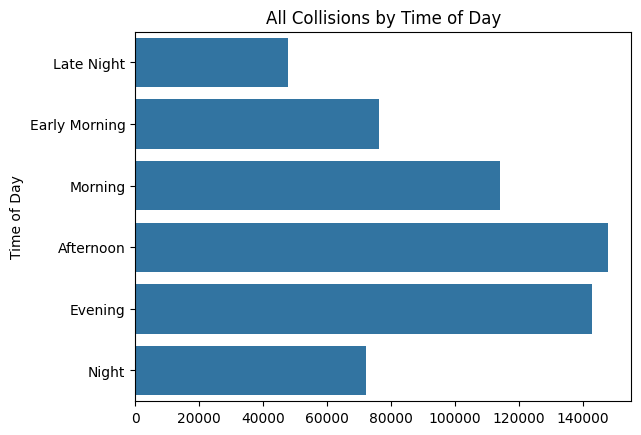

In [322]:
#Visualizing # of collisions by time of day
df_time = df.groupby(df["Time of Day"]).size()
sns.barplot(data=df_time, orient = 'h')
plt.title("All Collisions by Time of Day")
plt.show()

C:\Users\dbmcm\AppData\Local\Temp\ipykernel_19740\270722451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_time_fatal = df.groupby(df["Time of Day"])['Fatality'].sum()


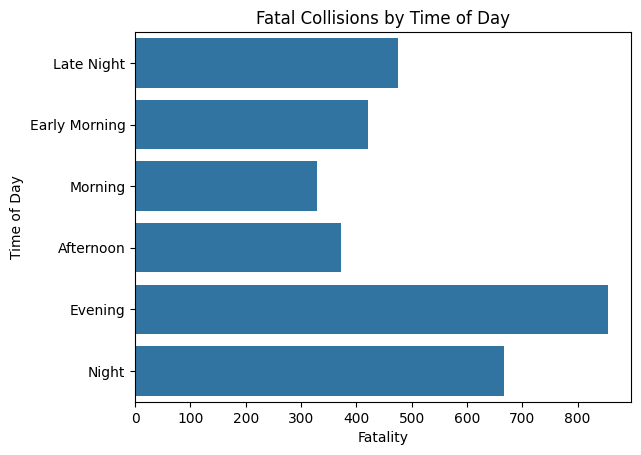

In [320]:
#Visualizing # of fatal collisions by time of day
df_time_fatal = df.groupby(df["Time of Day"])['Fatality'].sum()
sns.barplot(data=df_time_fatal, orient = 'h')
plt.title("Fatal Collisions by Time of Day")
plt.show()


C:\Users\dbmcm\AppData\Local\Temp\ipykernel_19740\2597804113.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_time_fatal = df.groupby(df["Time of Day"])['Severe_injury'].sum()


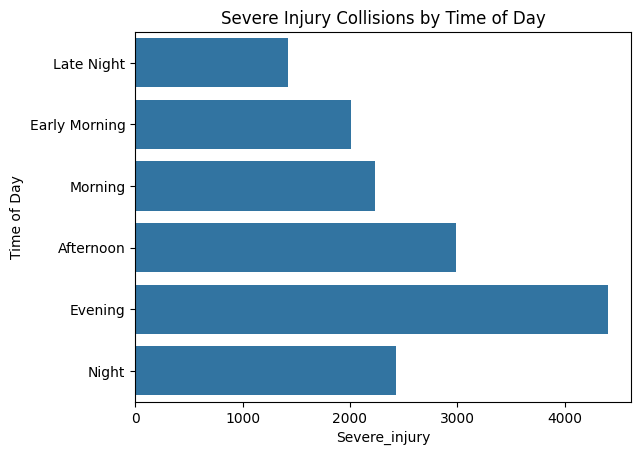

In [321]:
#Visualizing # of severe collisions by time of day
df_time_fatal = df.groupby(df["Time of Day"])['Severe_injury'].sum()
sns.barplot(data=df_time_fatal, orient = 'h')
plt.title("Severe Injury Collisions by Time of Day")
plt.show()


In [461]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay


df['SeriousInjuryOrFatality'] = (df['Severe_injury'] == 1) | (df['Fatality'] == 1)
df['SeriousInjuryOrFatality'] = df['SeriousInjuryOrFatality'].astype(int)  # Convert to binary (0 or 1)
target = 'SeriousInjuryOrFatality'
features = ['Time of Day', 'Area Name', 'Victim Sex', 'Victim Age', 'Victim Descent', 
            'Fixed_object_involved', 'Multiple_cars_involved', 'At_intersetion',
            'Pedestrian_involved', 'Bicycle_involved', 'Hit_and_run', 'Movement']

# Prepare feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Identify categorical and numerical columns for preprocessor encoding
categorical_cols = ['Time of Day', 'Area Name', 'Victim Sex', 'Victim Descent', 'Fixed_object_involved', 'Multiple_cars_involved', 'At_intersetion',
            'Pedestrian_involved', 'Bicycle_involved', 'Hit_and_run', 'Movement']
numerical_cols = ['Victim Age']

# Define preprocessing for categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first', handle_unknown = 'ignore'))
        ]), categorical_cols),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ]
)

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', penalty = 'l1', C = 0.5, random_state=42,class_weight='balanced'))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline.fit(X_train, y_train)

y_proba_logreg = pipeline.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       1.00      0.16      0.27    119621
           1       0.04      0.98      0.07      3844

    accuracy                           0.18    123465
   macro avg       0.52      0.57      0.17    123465
weighted avg       0.97      0.18      0.26    123465

Accuracy: 0.18
Log-Loss: 0.5773
ROC-AUC: 0.7613


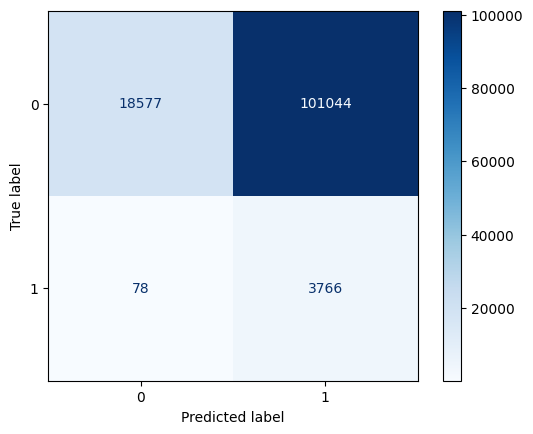

In [531]:
threshold = 0.2
y_pred = (y_proba_logreg >= threshold).astype(int)

#Evaluation
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

logloss_value = log_loss(y_test, y_proba_logreg)
print(f"Log-Loss: {logloss_value:.4f}")

cm_lr = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot(cmap='Blues', values_format='d')

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_proba_logreg)
print(f"ROC-AUC: {roc_auc:.4f}")

In [36]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [344]:
#XGBoost wasn't working well with the original data set, so this code is to rebalance the data set into a 50/50 split between 1's and 0's in the target vector.

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

df_majority = df[df['SeriousInjuryOrFatality'] == 0]
df_minority = df[df['SeriousInjuryOrFatality'] == 1]

df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),  
    random_state=42
)
# Combine the new majority class with previous minority class to obtain 50/50 split
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into features (X) and target (y)
X_balanced = df_balanced.drop(columns=['SeriousInjuryOrFatality'])
y_balanced = df_balanced['SeriousInjuryOrFatality']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)



In [482]:
#Creating the XGBoost Model using balanced data (but training on original x_test and y_test data)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

xgb_model = XGBClassifier(
    learning_rate = 0.04, 
    max_depth = 100, 
    n_estimators = 200,
    scale_pos_weight=len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1]),  # To handle imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

pipeline_xgb.fit(X_train_balanced, y_train_balanced)

y_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]

C:\Users\dbmcm\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:55:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dbmcm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.68      0.81    119621
           1       0.08      0.90      0.15      3844

    accuracy                           0.68    123465
   macro avg       0.54      0.79      0.48    123465
weighted avg       0.97      0.68      0.79    123465

Accuracy: 0.68
Log-Loss: 0.6573
ROC-AUC: 0.8645


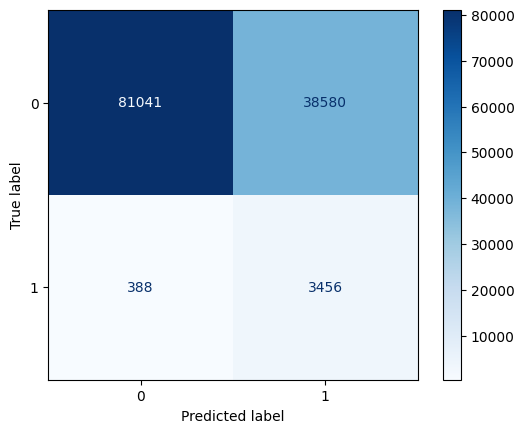

In [549]:
threshold = 0.5
y_pred_xgb = (y_proba_xgb >= threshold).astype(int)

#Evaluation
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")

logloss_value = log_loss(y_test, y_proba_xgb)
print(f"Log-Loss: {logloss_value:.4f}")

cm_xg = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xg)
disp.plot(cmap='Blues', values_format='d')

roc_auc = roc_auc_score(y_test, y_proba_xgb)
print(f"ROC-AUC: {roc_auc:.4f}")

In [209]:
!pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Classification Report (Combined Model):
              precision    recall  f1-score   support

           0       1.00      0.68      0.81    119621
           1       0.08      0.91      0.15      3844

    accuracy                           0.69    123465
   macro avg       0.54      0.79      0.48    123465
weighted avg       0.97      0.69      0.79    123465

Accuracy: 0.69
Log Loss: 0.5976
ROC-AUC: 0.8790


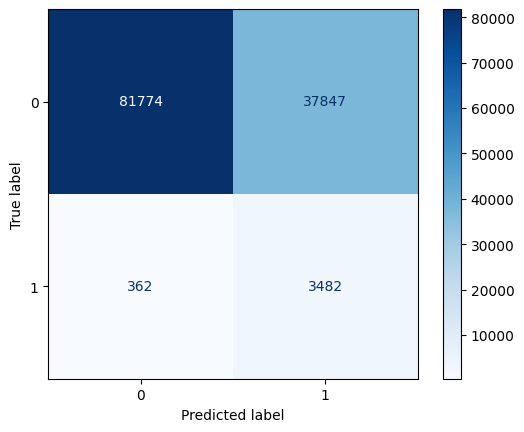

In [526]:
#Seeing if we can create a better model by combining the prior two

y_proba_avg = 0.5*y_proba_xgb+0.5*y_proba_rf
threshold = 0.5
averaged_predictions = (y_proba_avg >= threshold).astype(int)

print("Classification Report (Combined Model):")
print(classification_report(y_test, averaged_predictions))

print(f"Accuracy: {accuracy_score(y_test, averaged_predictions):.2f}")
print(f"Log Loss: {log_loss(y_test, y_proba_avg):.4f}")

cm = confusion_matrix(y_test, averaged_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

roc_auc = roc_auc_score(y_test, y_proba_avg)
print(f"ROC-AUC: {roc_auc:.4f}")

C:\Users\dbmcm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89    119621
           1       0.07      0.42      0.12      3844

    accuracy                           0.80    123465
   macro avg       0.52      0.62      0.50    123465
weighted avg       0.95      0.80      0.86    123465

Log Loss: 0.6462
ROC-AUC: 0.6932


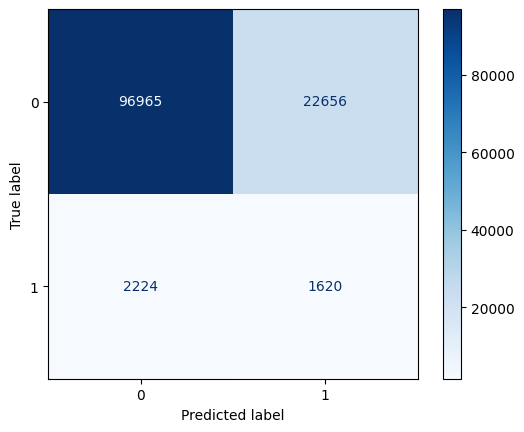

In [517]:
#Trying a Naive Bayes Model: 

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.decomposition import PCA
# Need to convert the data from sparse to dense for NB to work

class DenseTransformer(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.toarray() if hasattr(X, "toarray") else X

nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)), 
    ('to_dense', DenseTransformer()),
    ('classifier', GaussianNB())
])

nb_pipeline.fit(X_train_balanced, y_train_balanced)
y_proba_nb = nb_pipeline.predict_proba(X_test)[:,1]
threshold = 0.6
y_pred_nb = (y_proba_nb >= threshold).astype(int)

cm_nb = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot(cmap='Blues', values_format='d')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
print(f"Log Loss: {log_loss(y_test, y_proba_nb):.4f}")

roc_auc = roc_auc_score(y_test, y_proba_nb)
print(f"ROC-AUC: {roc_auc:.4f}")

C:\Users\dbmcm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.69      0.81    119621
           1       0.08      0.89      0.15      3844

    accuracy                           0.69    123465
   macro avg       0.54      0.79      0.48    123465
weighted avg       0.97      0.69      0.79    123465

Accuracy: 0.69
Log-Loss: 0.5936
ROC-AUC: 0.8764


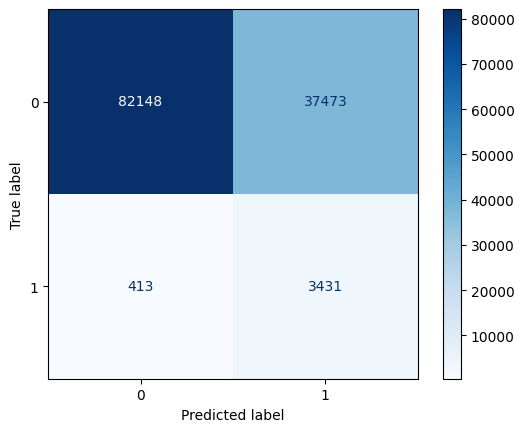

In [547]:
#Trying a Random Forest Model:

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay

rf_model = RandomForestClassifier(
    n_estimators=200,          
    max_depth=30,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

pipeline_rf.fit(X_train_balanced, y_train_balanced)

y_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1] 

threshold = 0.5
y_pred_rf = (y_proba_rf >= threshold).astype(int)

# Evaluation
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
logloss_value_rf = log_loss(y_test, y_proba_rf)
print(f"Log-Loss: {logloss_value_rf:.4f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues', values_format='d')

roc_auc = roc_auc_score(y_test, y_proba_rf)
print(f"ROC-AUC: {roc_auc:.4f}")

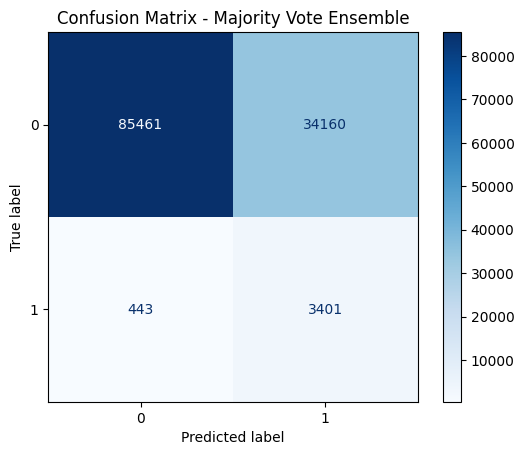


Classification Report - Majority Vote Ensemble:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83    119621
           1       0.09      0.88      0.16      3844

    accuracy                           0.72    123465
   macro avg       0.54      0.80      0.50    123465
weighted avg       0.97      0.72      0.81    123465



In [580]:
predictions = np.array([y_pred_rf, y_pred_xgb, y_pred_nb])  # Shape: (3, n_samples)
y_pred_ensemble = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Majority Vote Ensemble")
plt.show()

print("\nClassification Report - Majority Vote Ensemble:")
print(classification_report(y_test, y_pred_ensemble))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82    119621
           1       0.09      0.89      0.16      3844

    accuracy                           0.71    123465
   macro avg       0.54      0.80      0.49    123465
weighted avg       0.97      0.71      0.80    123465

Log Loss: 0.4797
Accuracy: 0.71
ROC-AUC: 0.8789


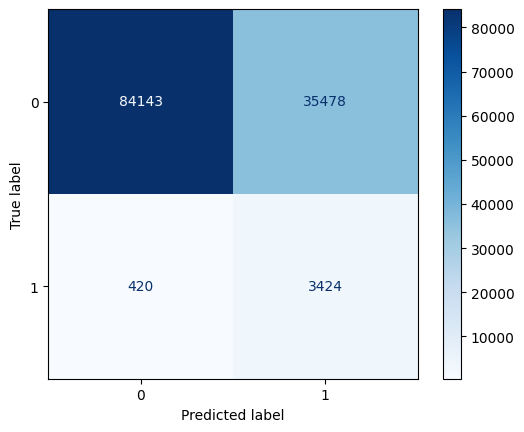

In [591]:
#Ensemble of all models so far. 
#For some reason subtracting 1/10 of the probability found in NB seems to produce better results. Why?

y_proba_ensemble = 0.45*y_proba_xgb + 0.45 * y_proba_rf + .1*y_proba_logreg - 0.1 * y_proba_nb
threshold = 0.47
y_pred_ensemble = (y_proba_ensemble >= threshold).astype(int)

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble)
disp.plot(cmap='Blues', values_format='d')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))
print(f"Log Loss: {log_loss(y_test, y_proba_ensemble):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble):.2f}")
roc_auc = roc_auc_score(y_test, y_proba_ensemble)
print(f"ROC-AUC: {roc_auc:.4f}")
# So far this seems to work best of all models, followed by XG boost

In [221]:
y_proba_nb

array([0.04965391, 0.0454732 , 0.00255493, ..., 0.04736814, 0.00020044,
       0.00209477])

In [561]:
#Trying a conditional model, where if p<0.2, logreg value is used. If p > 0.8, XBG model is used, otherwise ensemble model is used
import numpy as np
y_proba_combined = np.copy(y_proba_rf)

condition_logreg = y_proba_logreg <= 0.2
y_proba_combined[condition_logreg] = y_proba_rf[condition_logreg]

condition_xgb = y_pred_proba_xgb >= 0.8
y_proba_combined[condition_xgb] = y_pred_proba_xgb[condition_xgb]

condition_combined = ~(condition_logreg | condition_xgb)
y_proba_combined[condition_combined] = y_proba_rf[condition_combined]
y_proba_combined

array([0.14043989, 0.89589727, 0.23812555, ..., 0.09169482, 0.05135958,
       0.03010331])

Classification Report (Triple Model):
              precision    recall  f1-score   support

           0       1.00      0.68      0.81    119621
           1       0.08      0.90      0.15      3844

    accuracy                           0.68    123465
   macro avg       0.54      0.79      0.48    123465
weighted avg       0.97      0.68      0.79    123465

Accuracy: 0.68
Log Loss: 0.6976


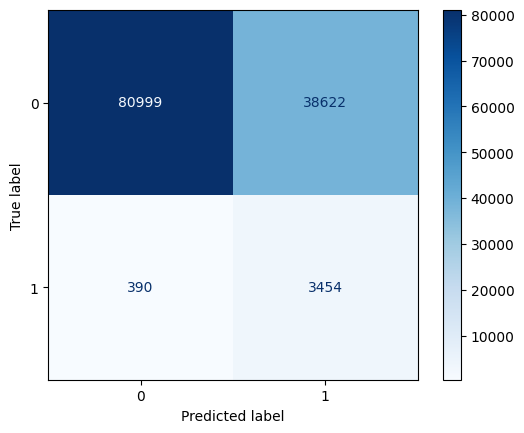

In [562]:
threshold = 0.5
averaged_predictions = (y_proba_combined >= threshold).astype(int)
print("Classification Report (Triple Model):")
print(classification_report(y_test, averaged_predictions))
print(f"Accuracy: {accuracy_score(y_test, averaged_predictions):.2f}")
print(f"Log Loss: {log_loss(y_test, y_proba_combined):.4f}")
cm_combined = confusion_matrix(y_test, averaged_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_combined)
disp.plot(cmap='Blues', values_format='d') 

In [473]:
# This cell takes a really long time to run. To shorten it use fewer testing parameters in the param_grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__learning_rate': [0.03,0.04,0.05],
    'classifier__max_depth': [20, 30, 50],
    'classifier__n_estimators': [50, 100, 200]
}
grid_search = GridSearchCV(pipeline_xgb, param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train_balanced, y_train_balanced)
print(grid_search.best_params_)

C:\Users\dbmcm\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:45:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dbmcm\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dbmcm\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:46:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

{'classifier__learning_rate': 0.04, 'classifier__max_depth': 20, 'classifier__n_estimators': 100}
